In [1]:
import tensorflow as tf

batch_size = 30

img_height, img_width  = 28, 28
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset_handwritting',
    validation_split = 0.2,
    seed = 1,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size)
    
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory ='dataset_handwritting',
    validation_split = 0.2,
    seed = 2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size)


class_names = val_data.class_names
print(class_names)


2024-05-18 11:08:19.259566: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 11:08:19.286061: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 11:08:19.698022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


2024-05-18 11:08:20.441907: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 11:08:20.442151: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


2024-05-18 11:08:20.839922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


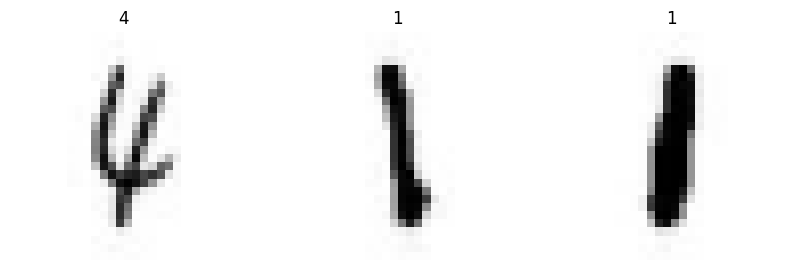

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [3]:
from tensorflow.keras import layers

'''
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    '''
num_classes = len(class_names)
model = tf.keras.Sequential([
    layers.Lambda(lambda x: x / 255.0),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq = 1, write_images=logdir)


In [4]:


model.fit(
    train_data,
    validation_data = val_data,
    epochs = 20,
    callbacks = [tensorboard_callback]
)


Epoch 1/20


/home/theofromardeche/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6227 - loss: 1.2215 - val_accuracy: 0.9395 - val_loss: 0.2012
Epoch 2/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.2170 - val_accuracy: 0.9535 - val_loss: 0.1460
Epoch 3/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1584 - val_accuracy: 0.9655 - val_loss: 0.1055
Epoch 4/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1210 - val_accuracy: 0.9725 - val_loss: 0.0843
Epoch 5/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0944 - val_accuracy: 0.9810 - val_loss: 0.0686
Epoch 6/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0792 - val_accuracy: 0.9835 - val_loss: 0.0557
Epoch 7/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0628 - val_accuracy: 0.9875 - val_loss: 0.0445
Epoch 8/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9830 - val_

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 39205), started 0:26:20 ago. (Use '!kill 39205' to kill it.)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,624 (314.94 KB)

 Trainable params: 26,874 (104.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,750 (209.96 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


LEGENDE : correct | predicted


2024-05-18 11:08:37.340690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


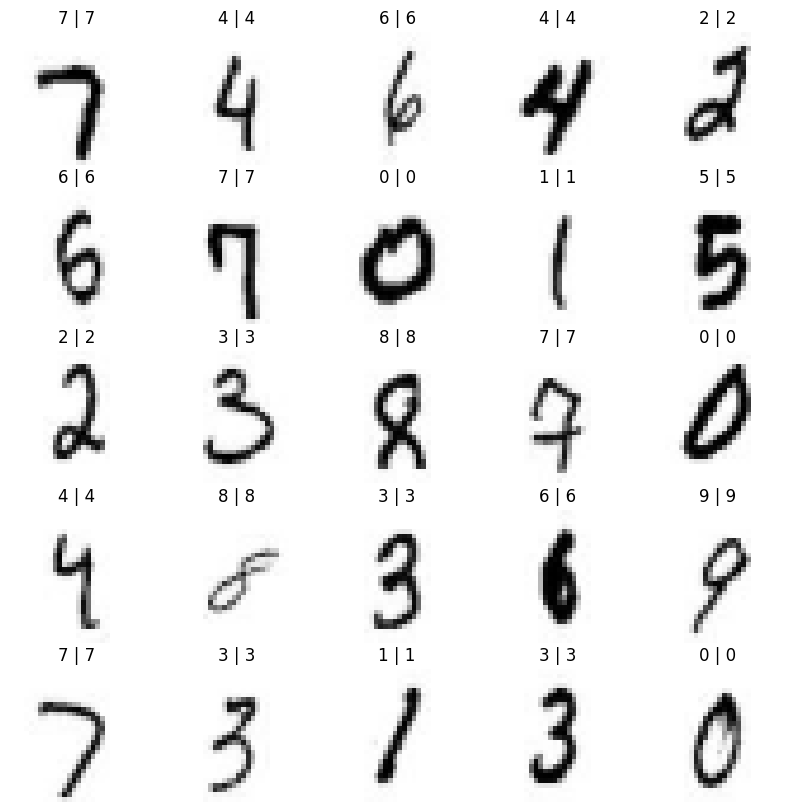

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.figure(figsize=(10, 10))
n = 5
for images, labels in val_data.take(1):
  for i in range(n**2):
    ax = plt.subplot(n, n, i + 1)
    plt.axis("off")
    image_to_predict = images[i].numpy().astype("uint8")
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(28,28)), axis=0) 
    res = class_names[np.argmax(model.predict(img_to_predict), axis = 1)[0]]
    plt.title(class_names[labels[i]]+" | "+res)
print("\n\nLEGENDE : correct | predicted")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.00179184e+34..4.9987784e+33].


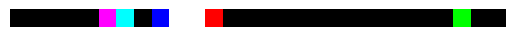



 0
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.00179184e+34..4.9987784e+33].


-----------------------------------------------------


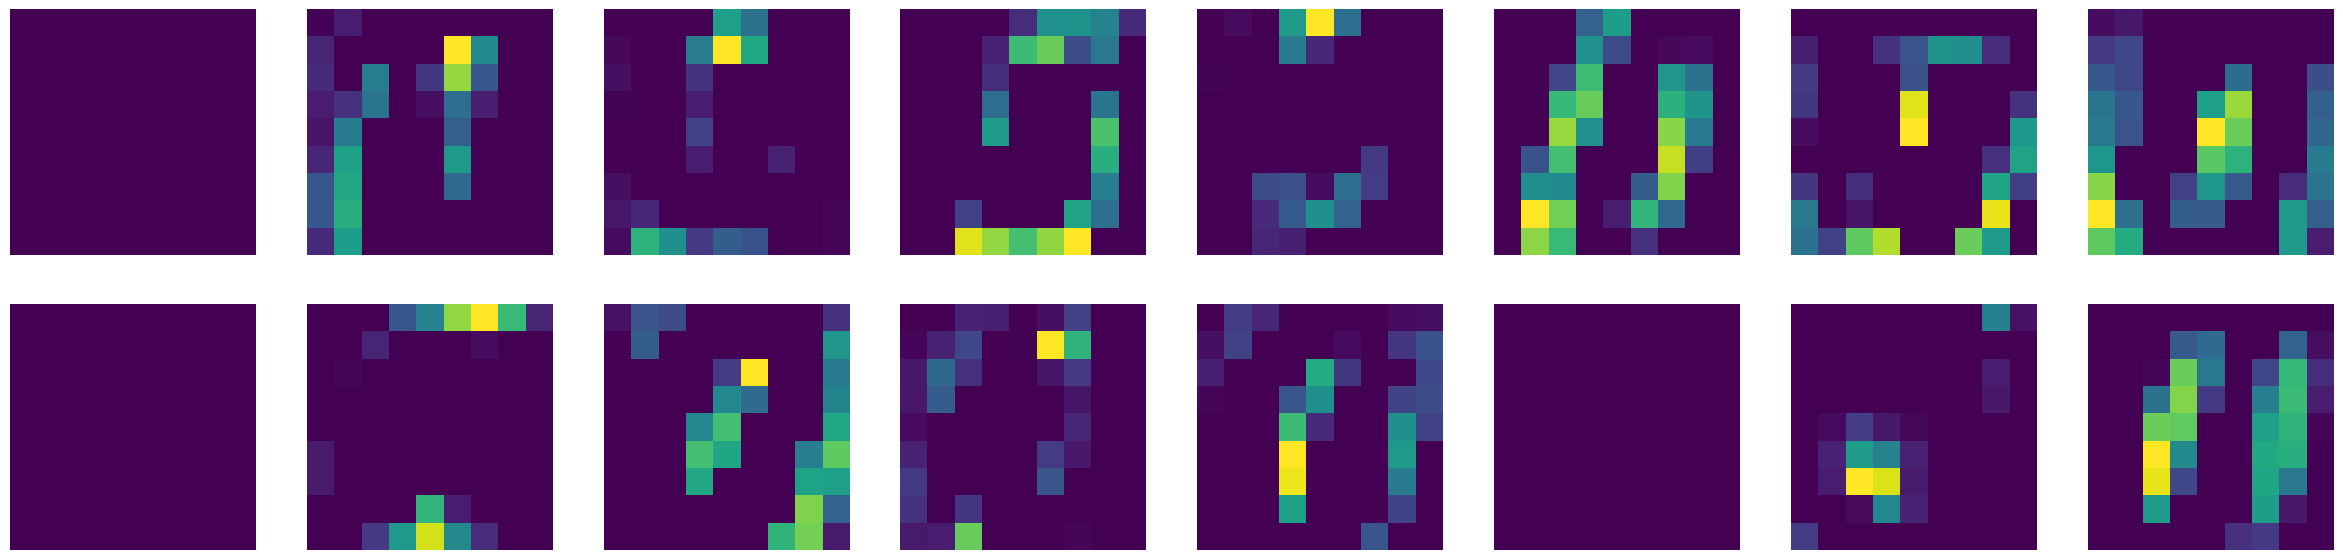

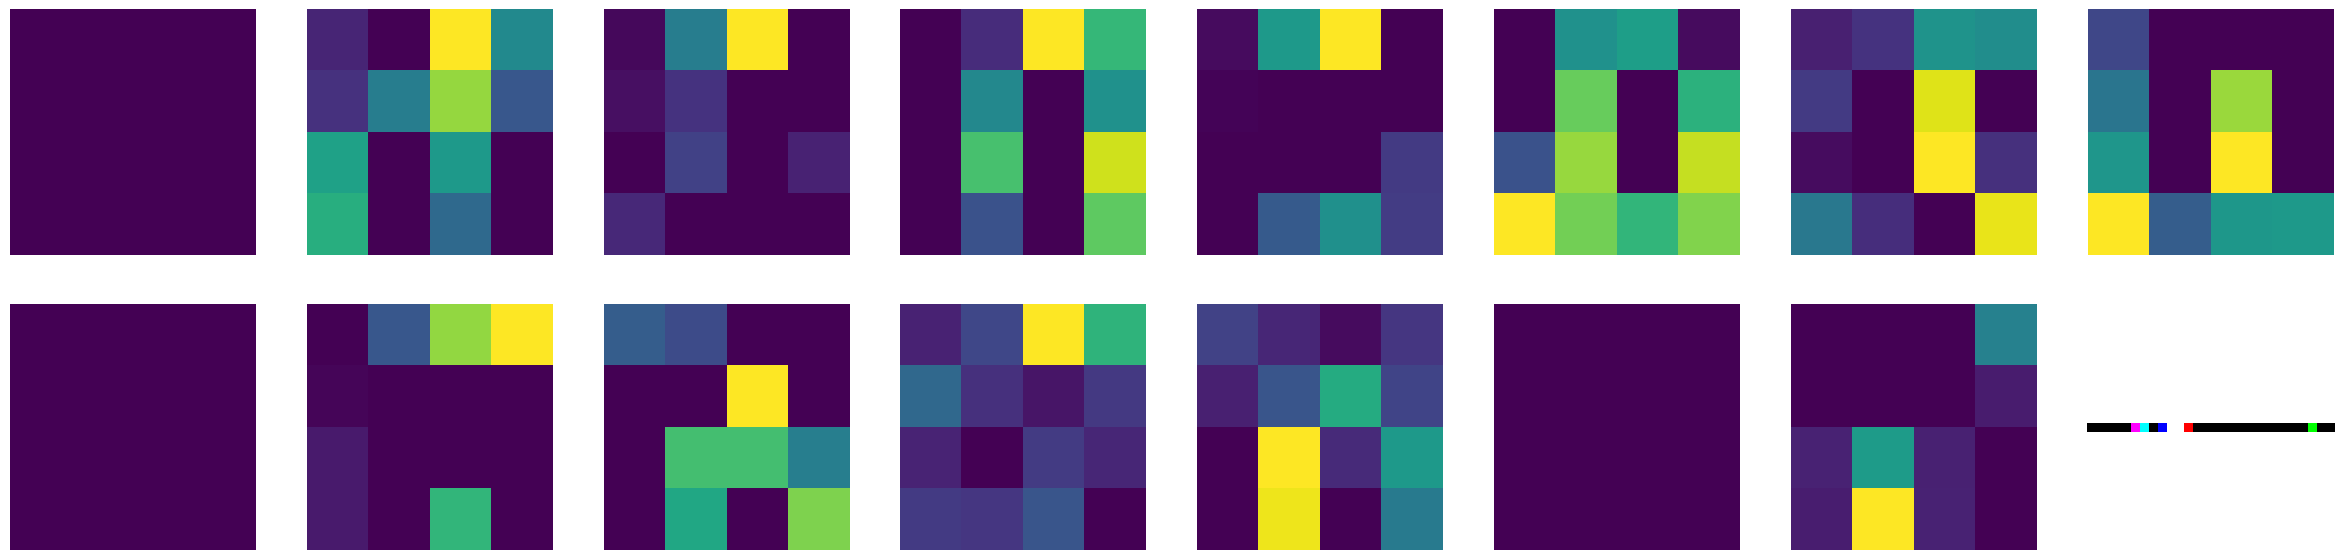



 1
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.00179184e+34..4.9987784e+33].


-----------------------------------------------------


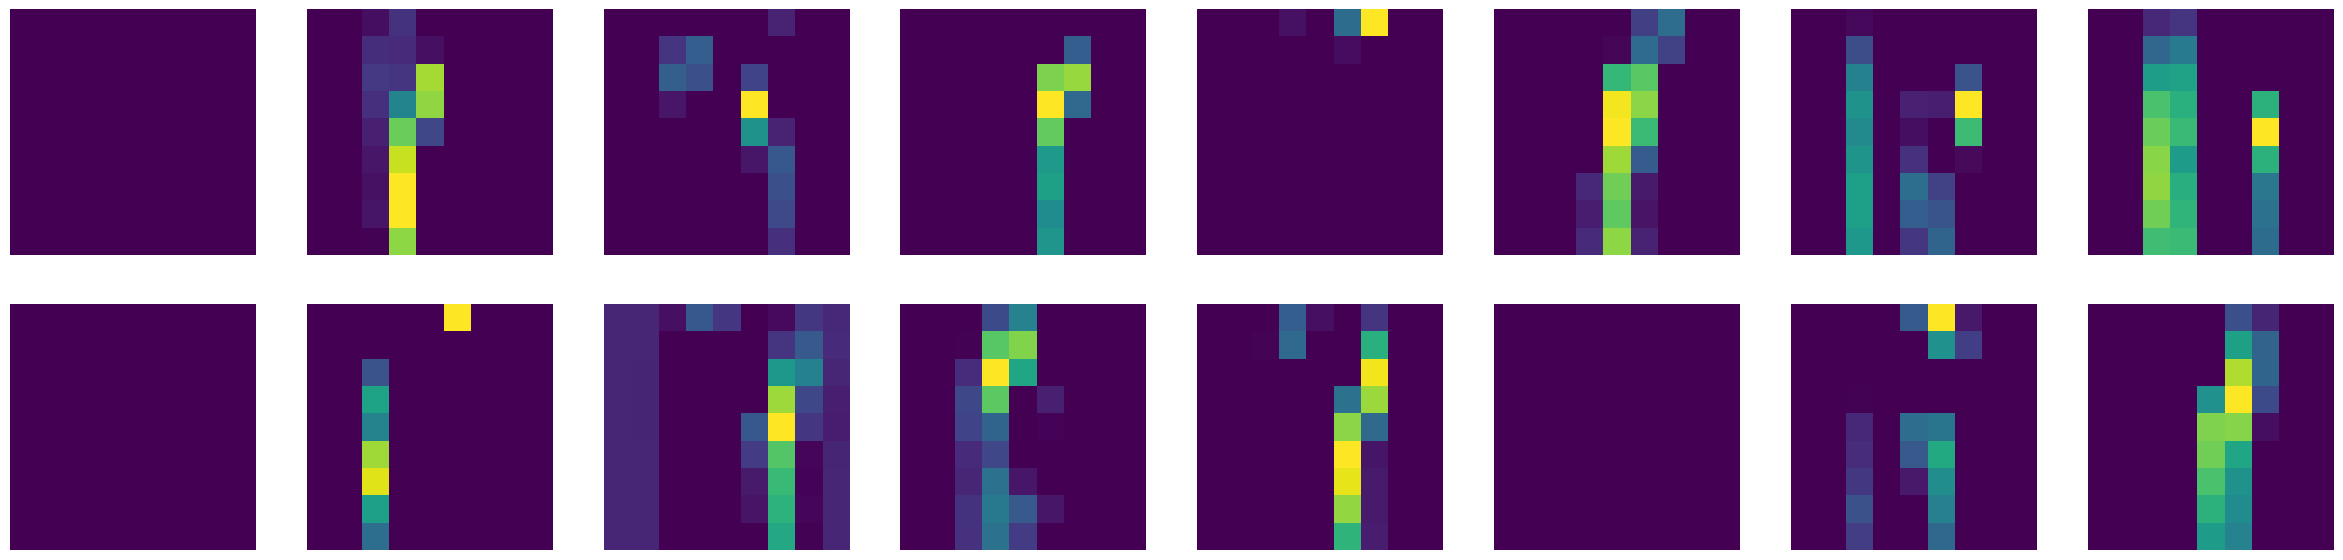

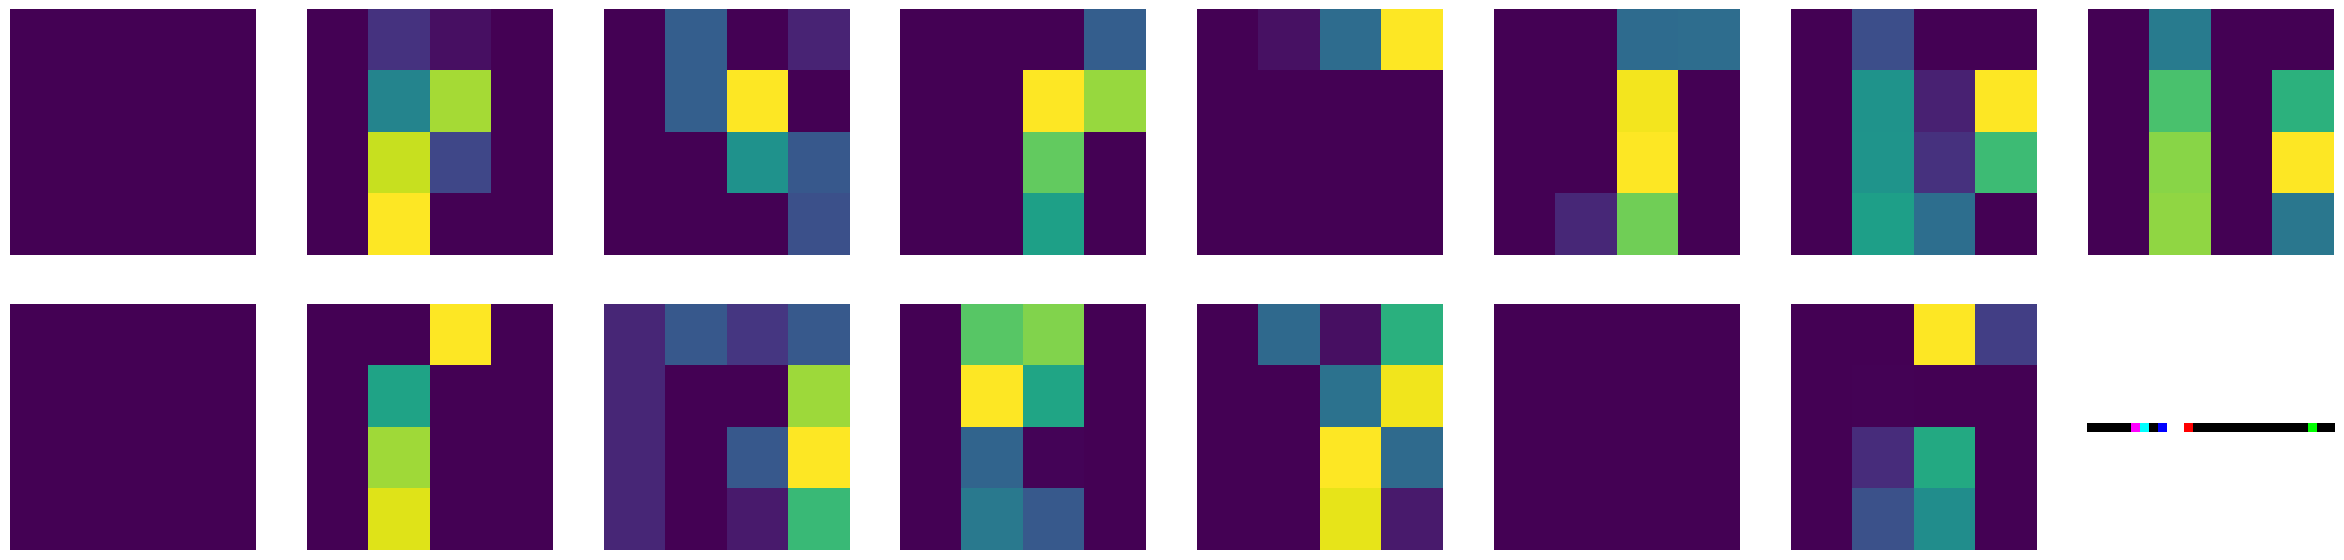



 2
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


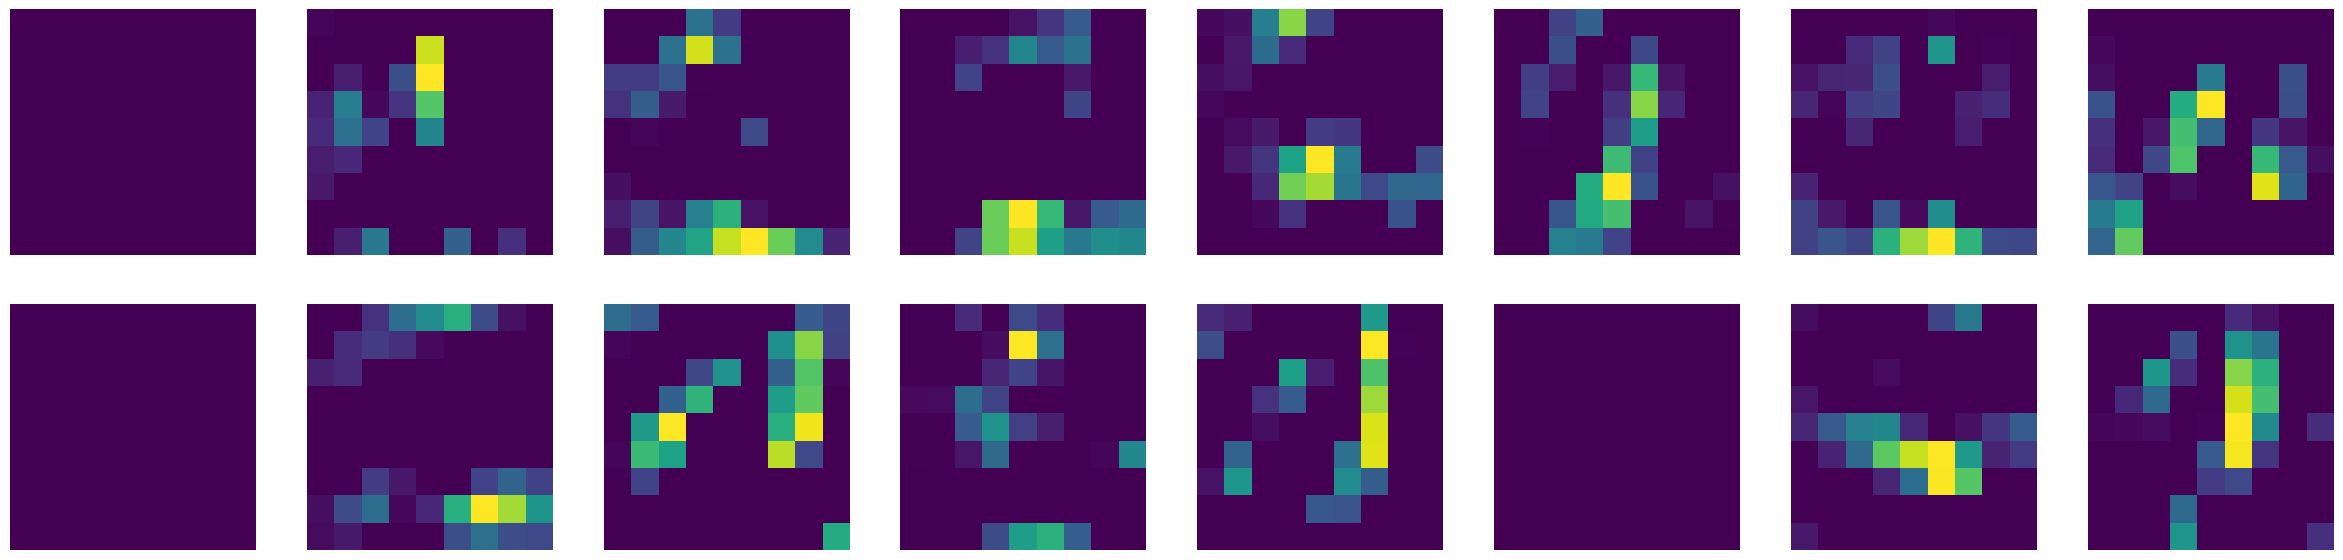

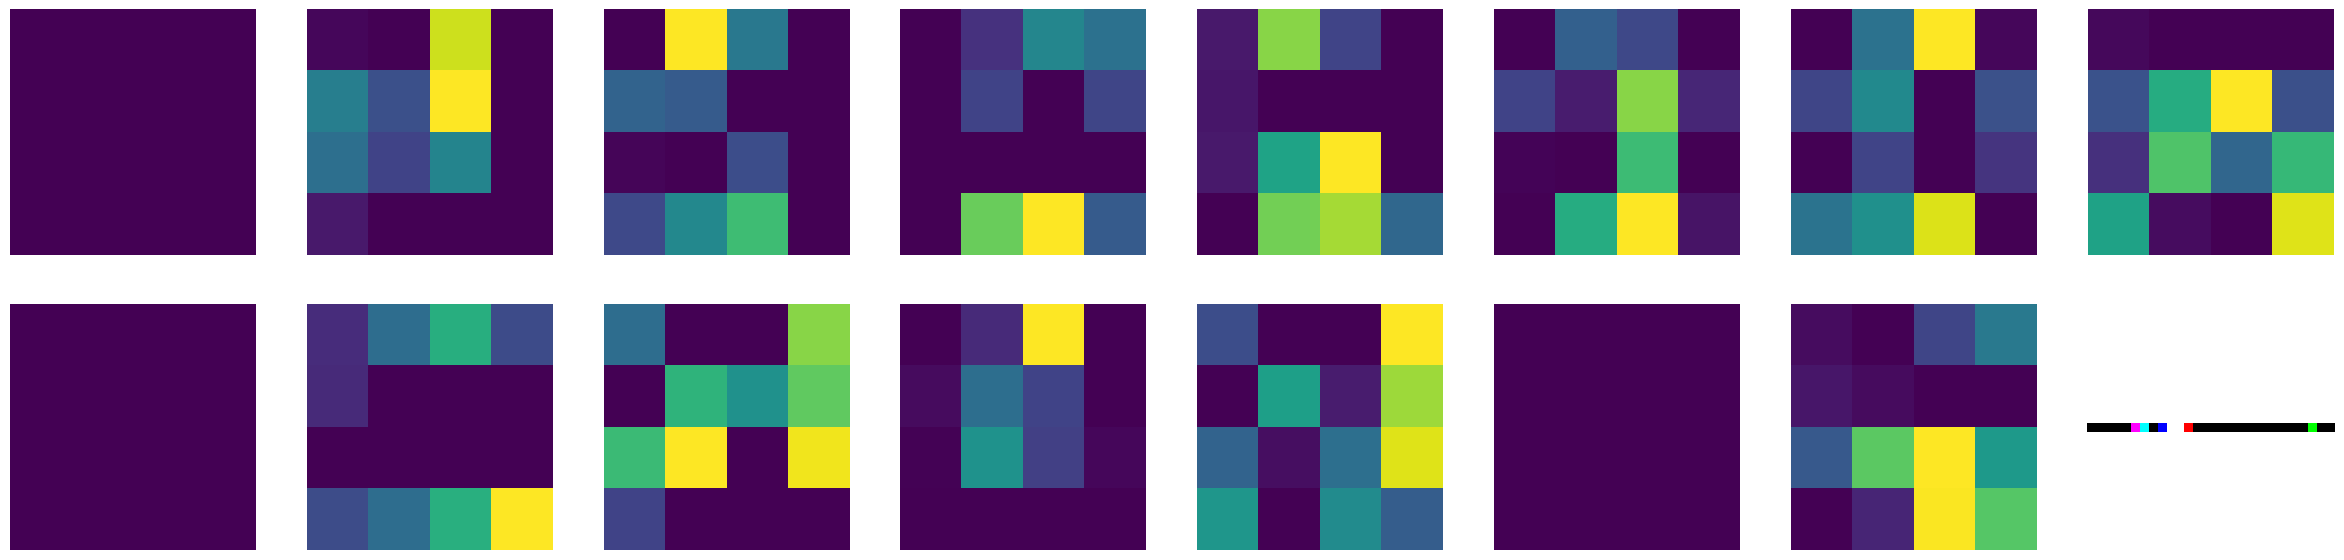



 3
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


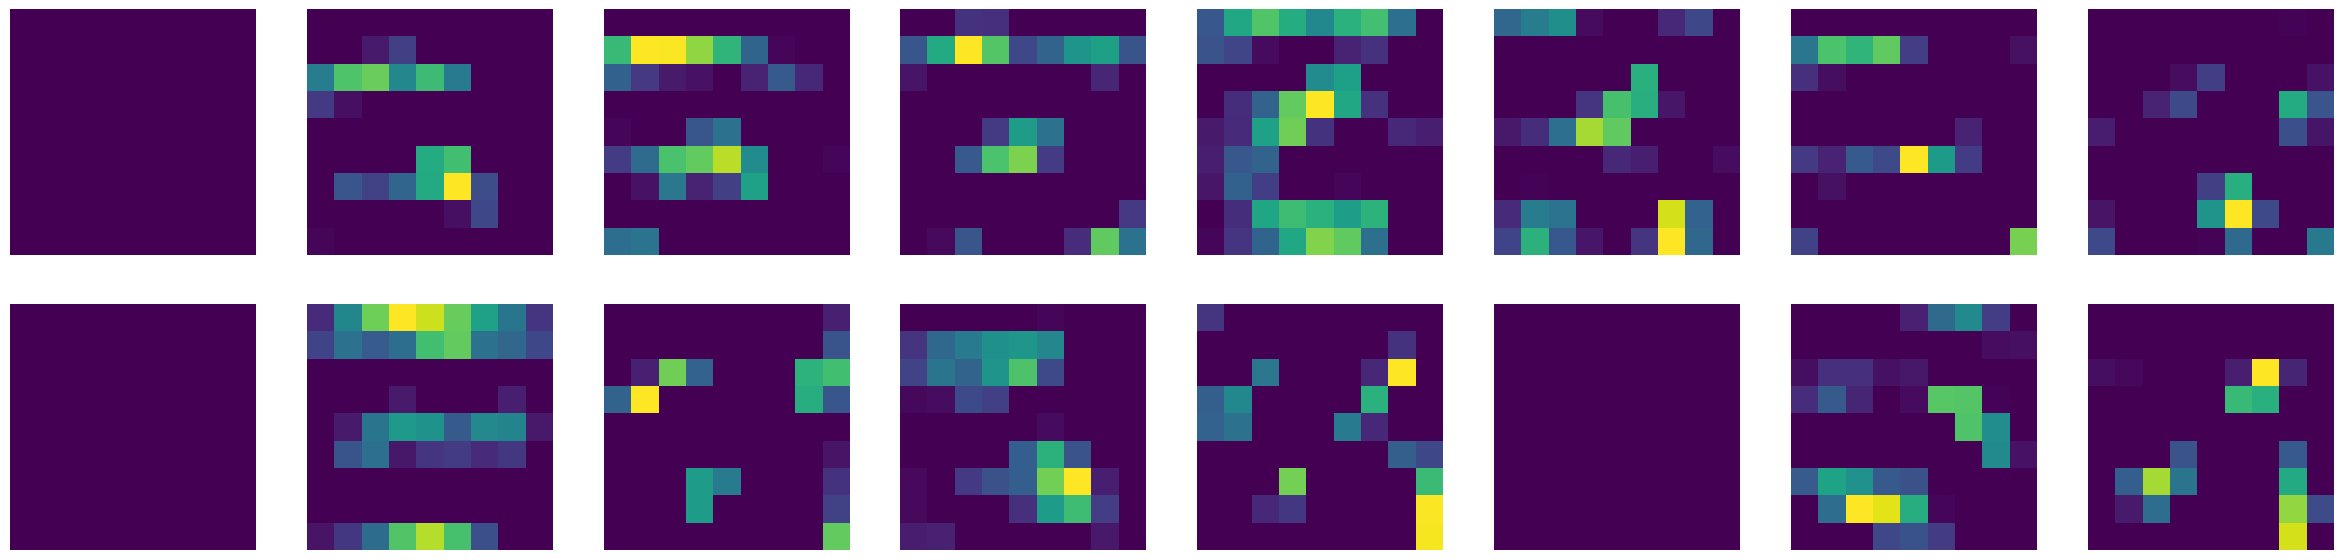

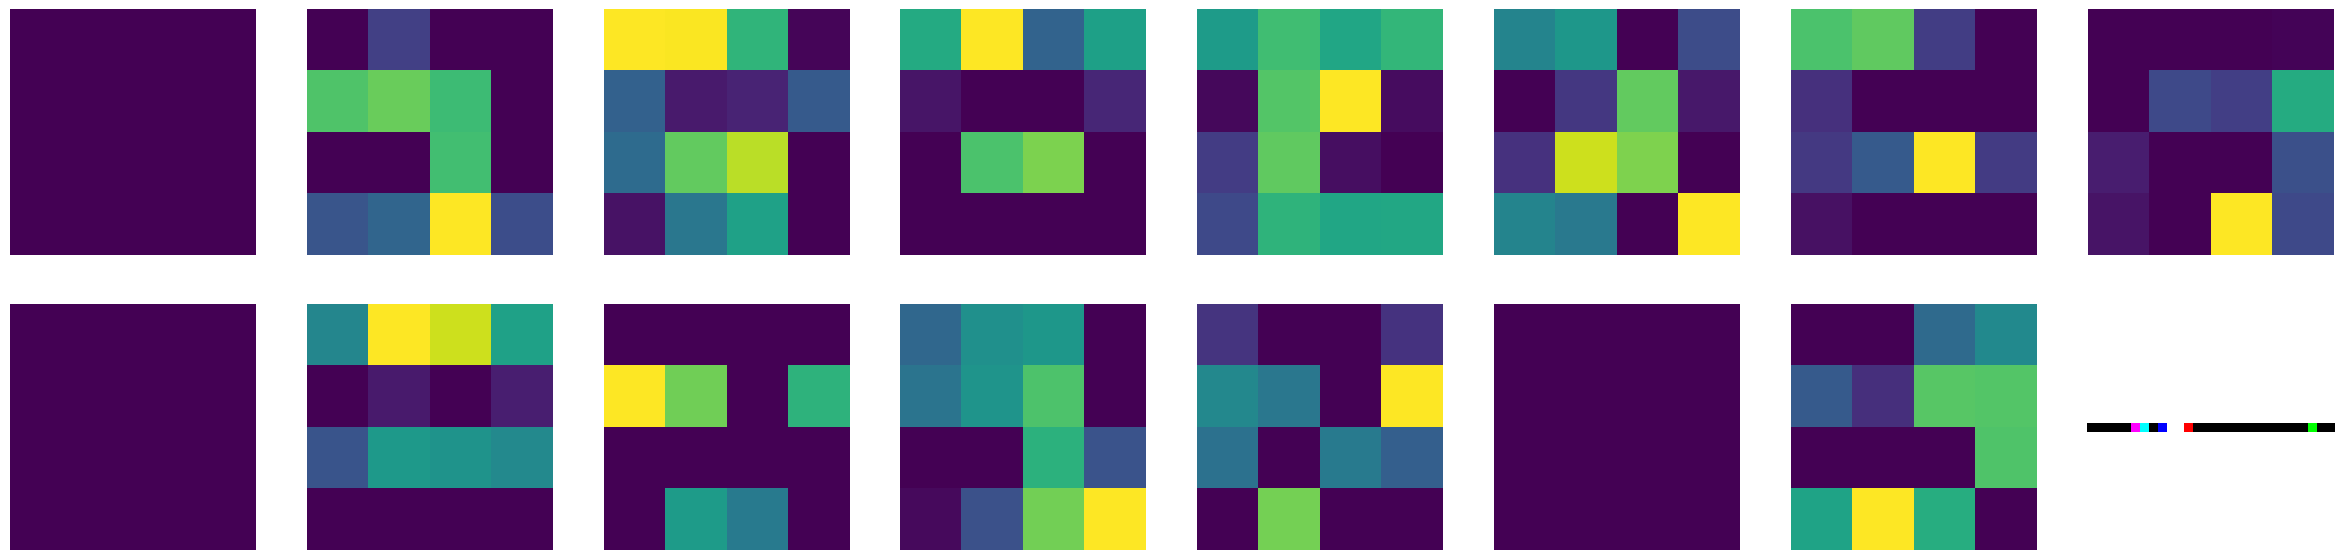



 4
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


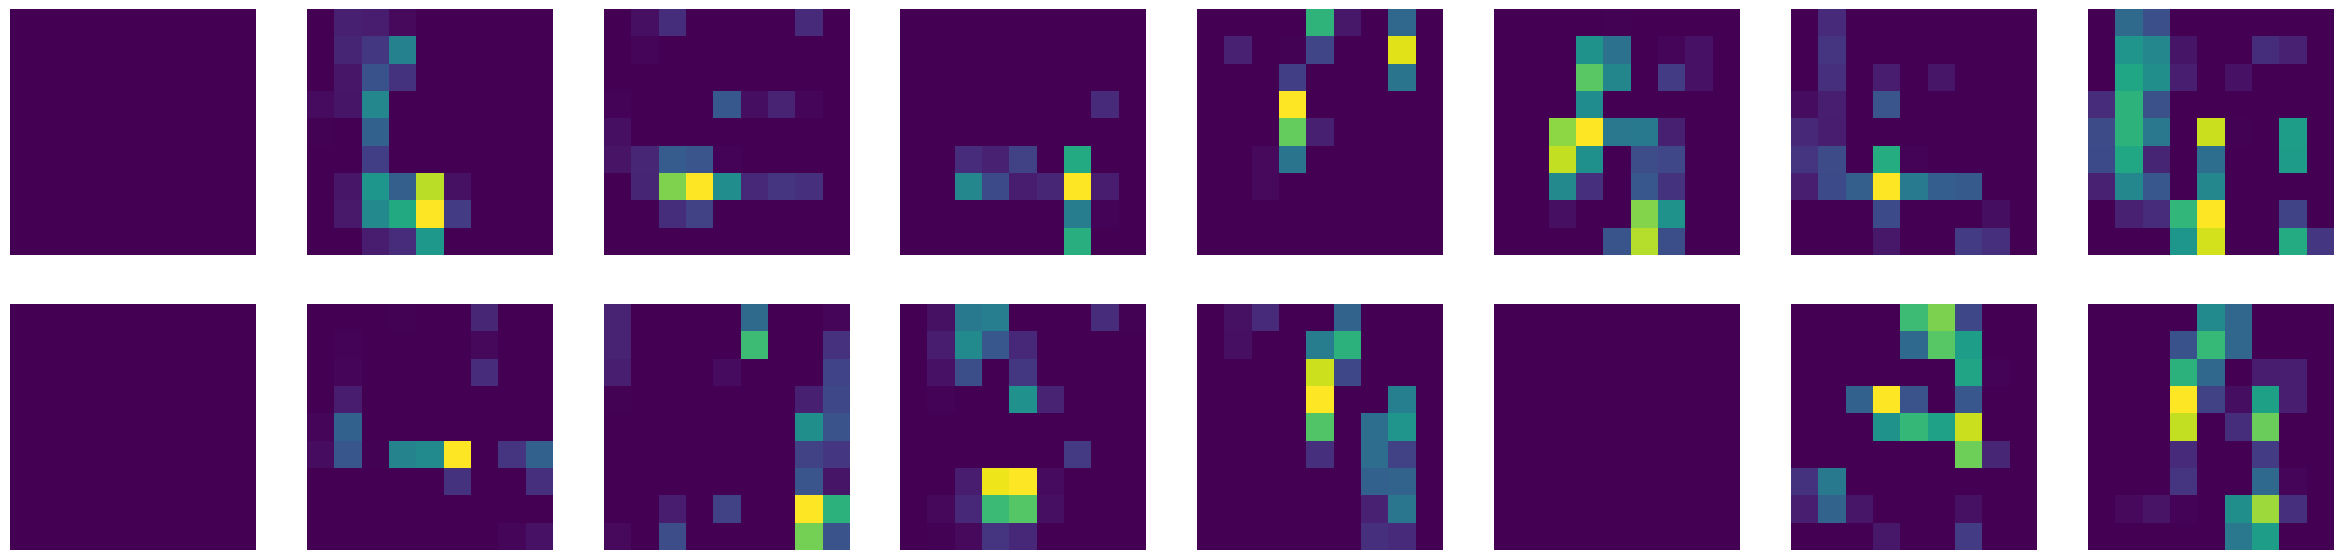

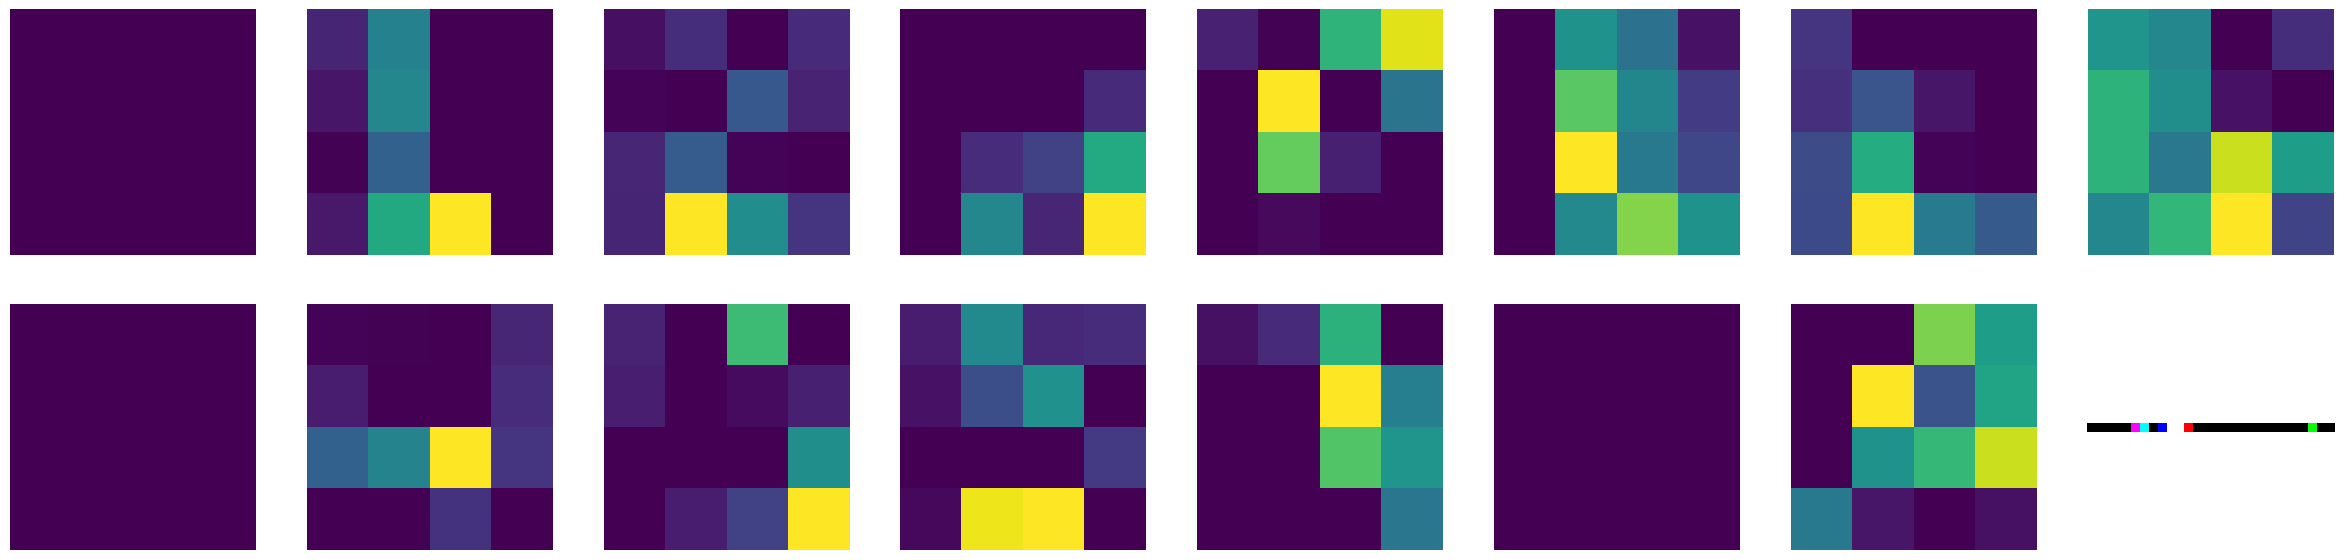



 5
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


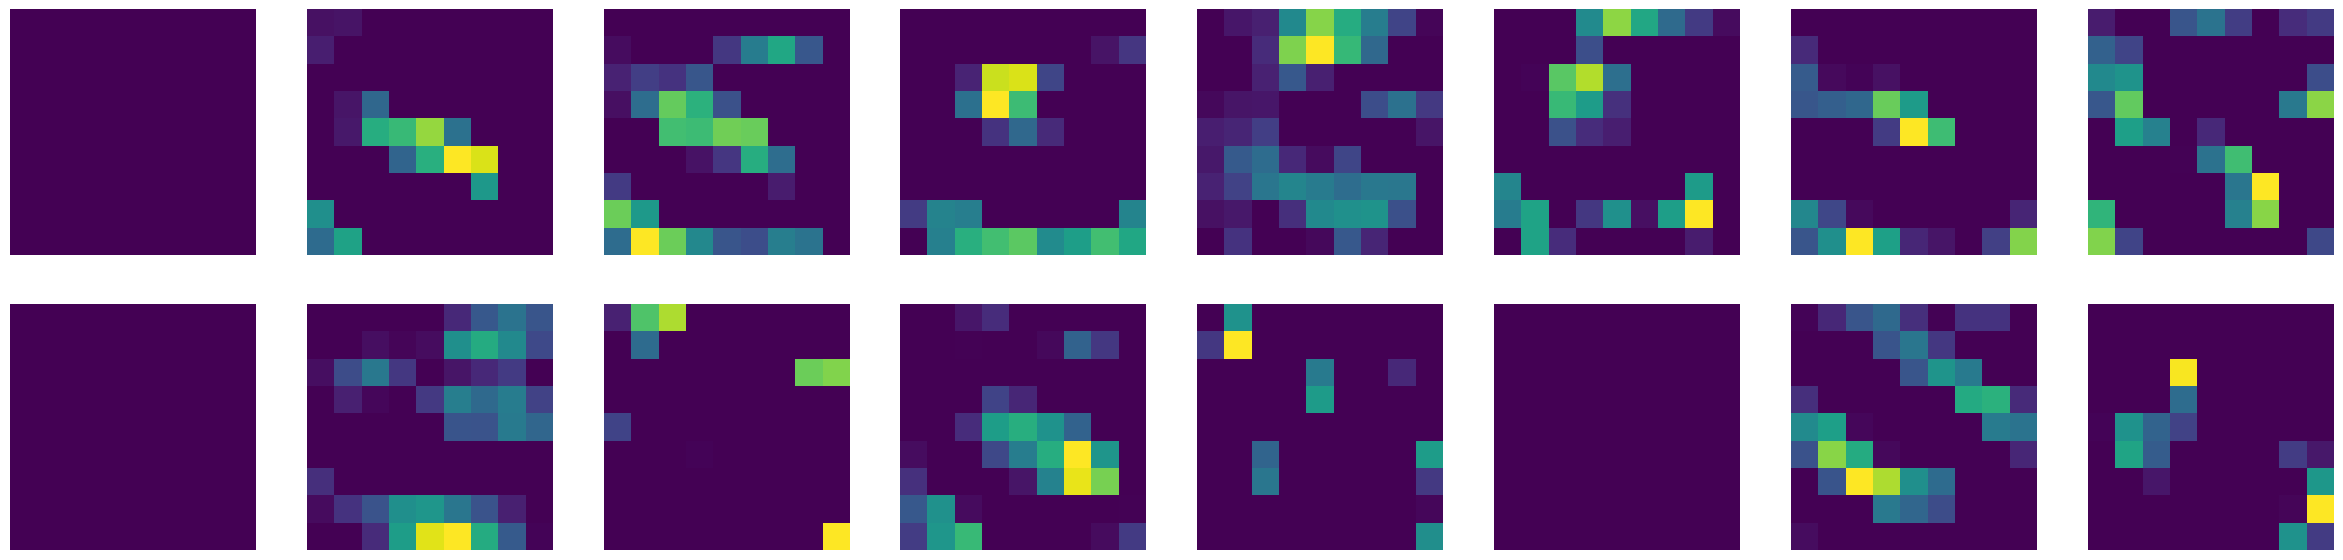

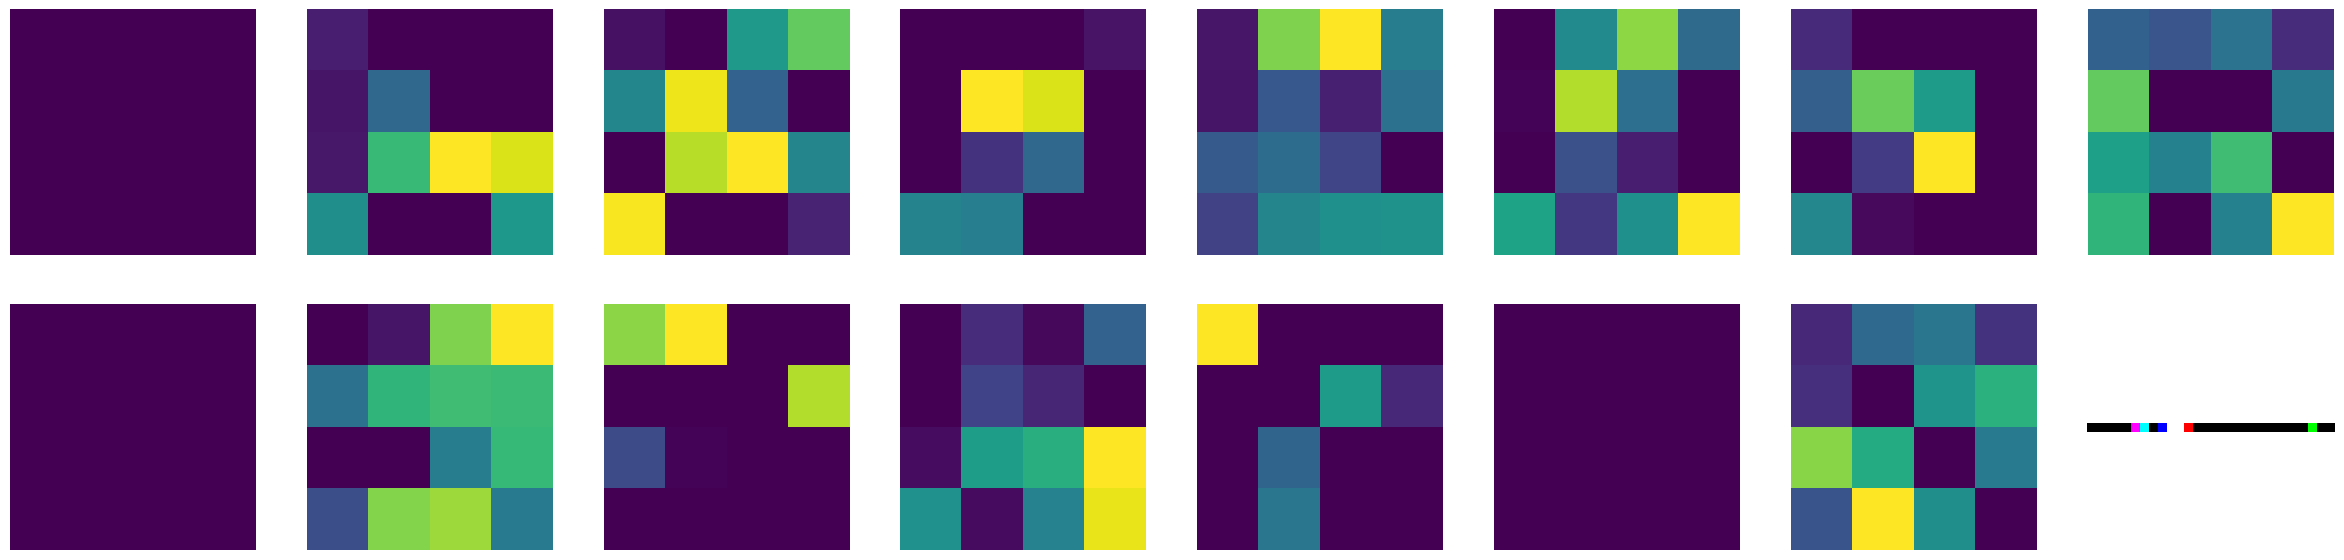



 6
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


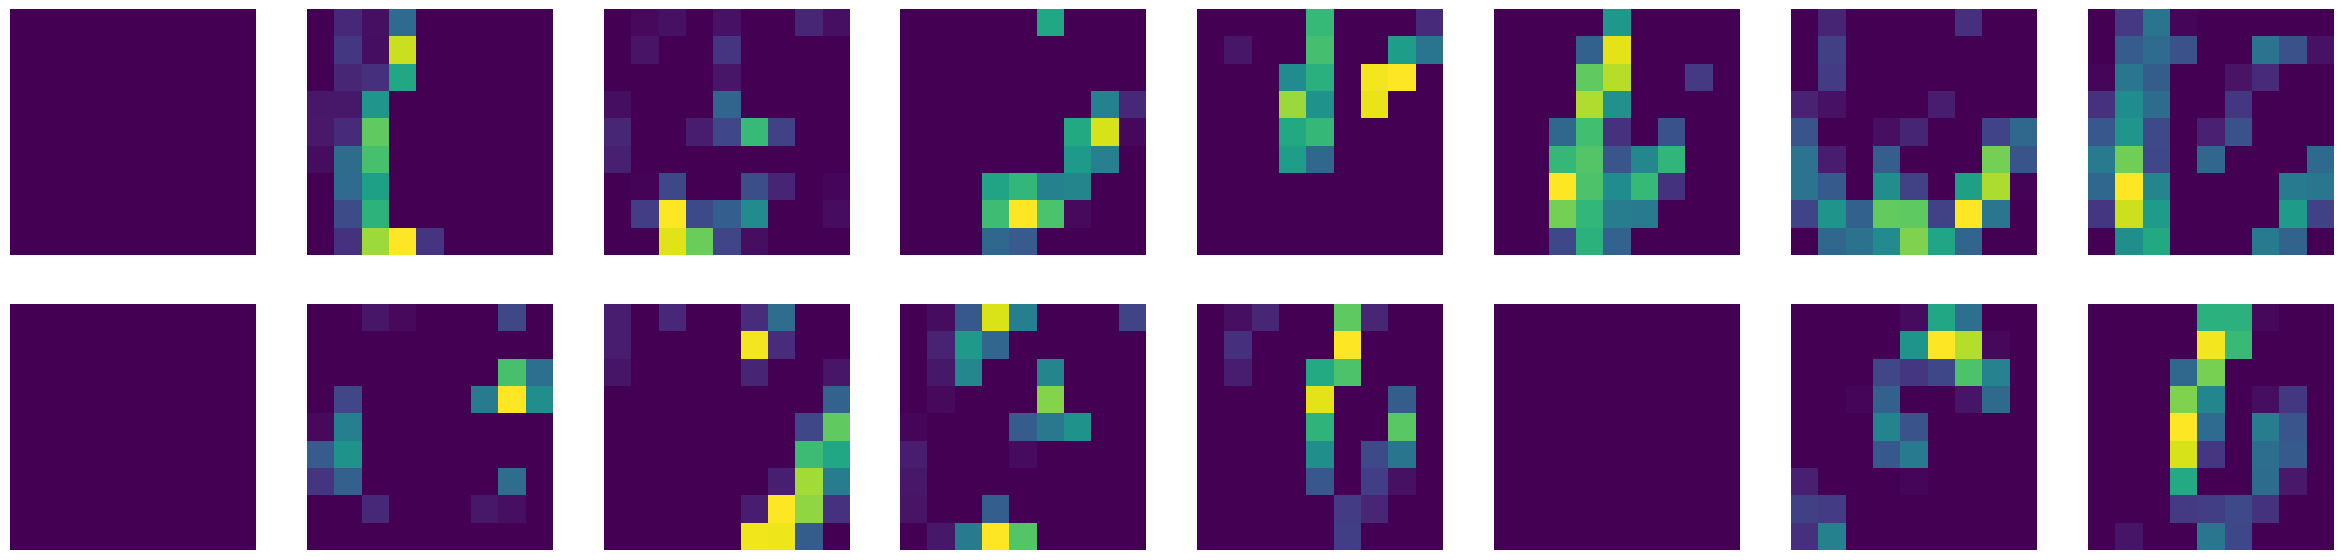

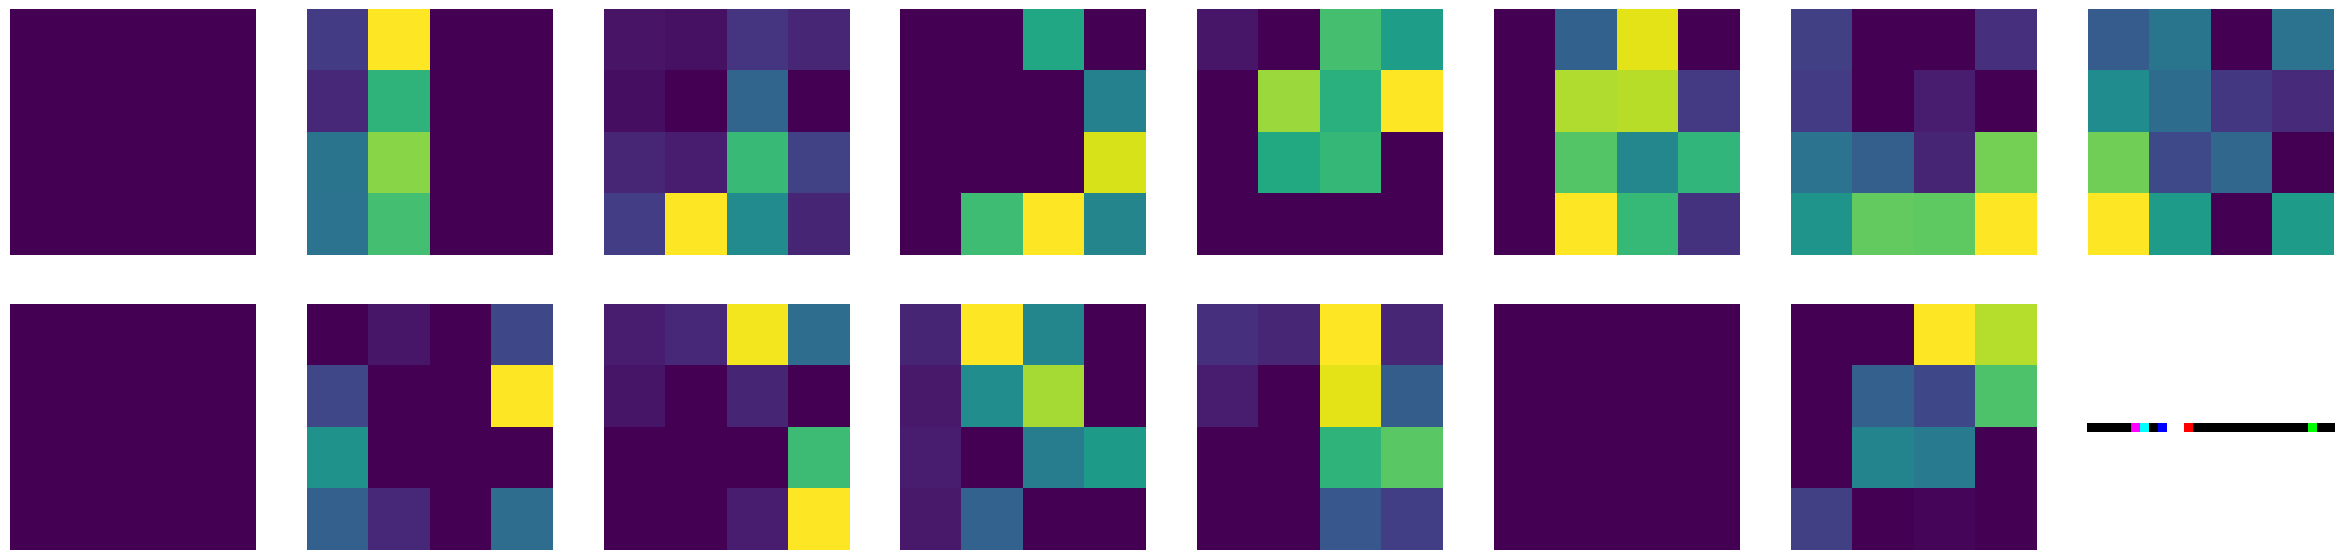



 7
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


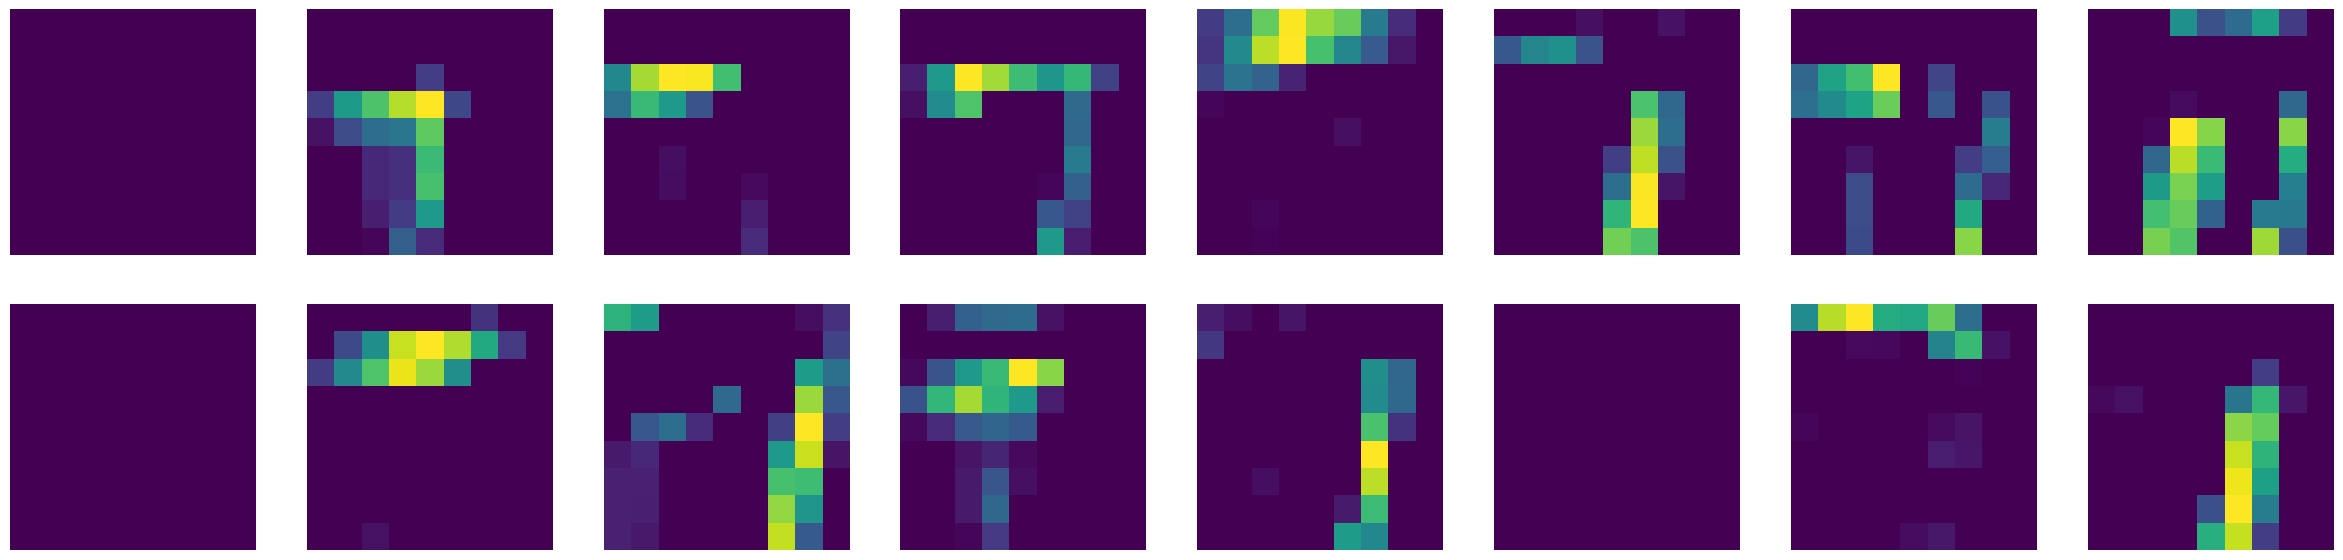

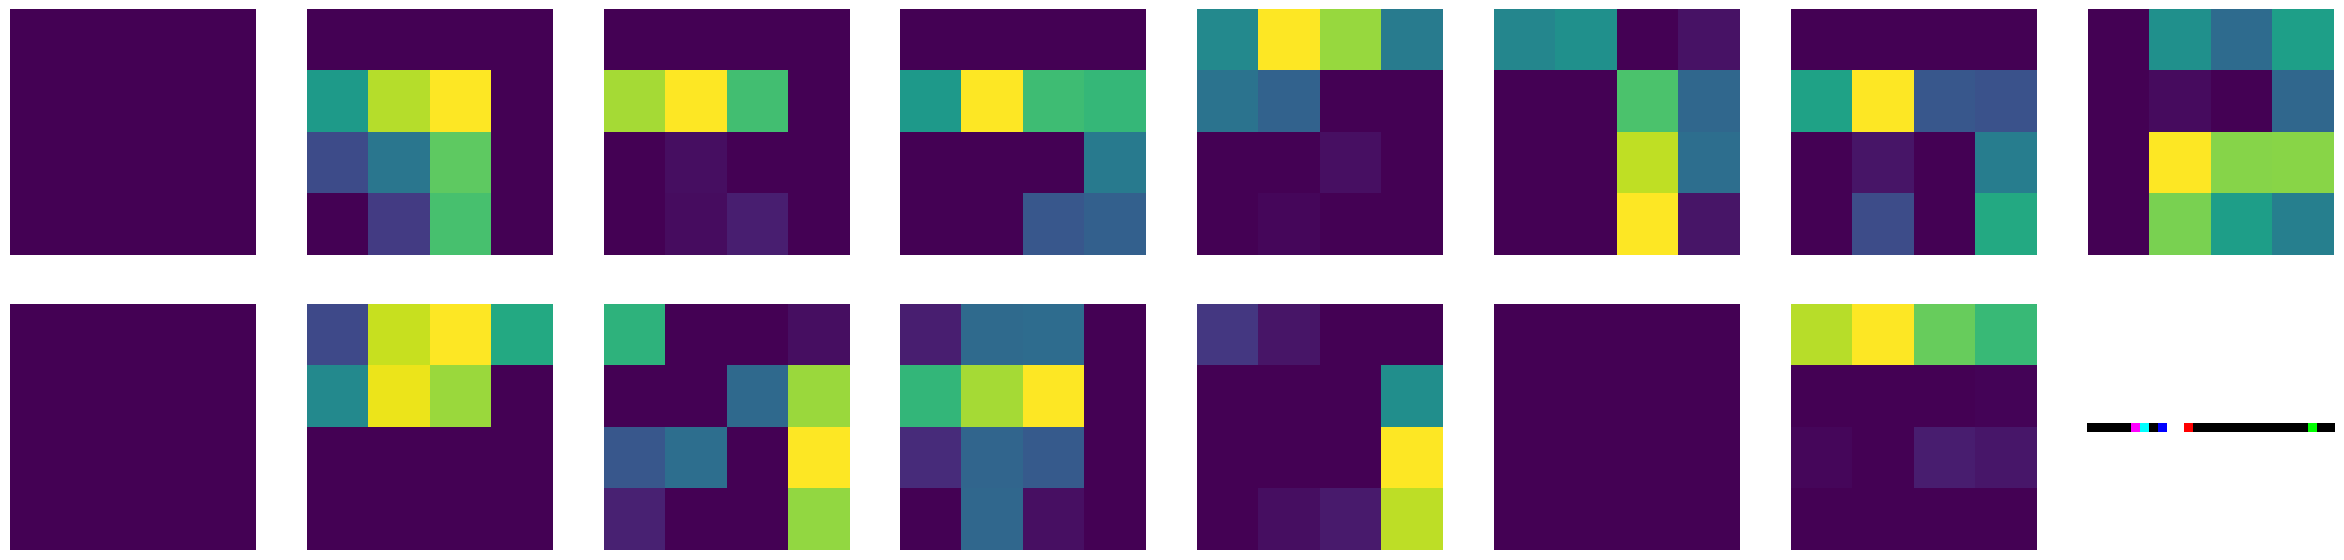



 8
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


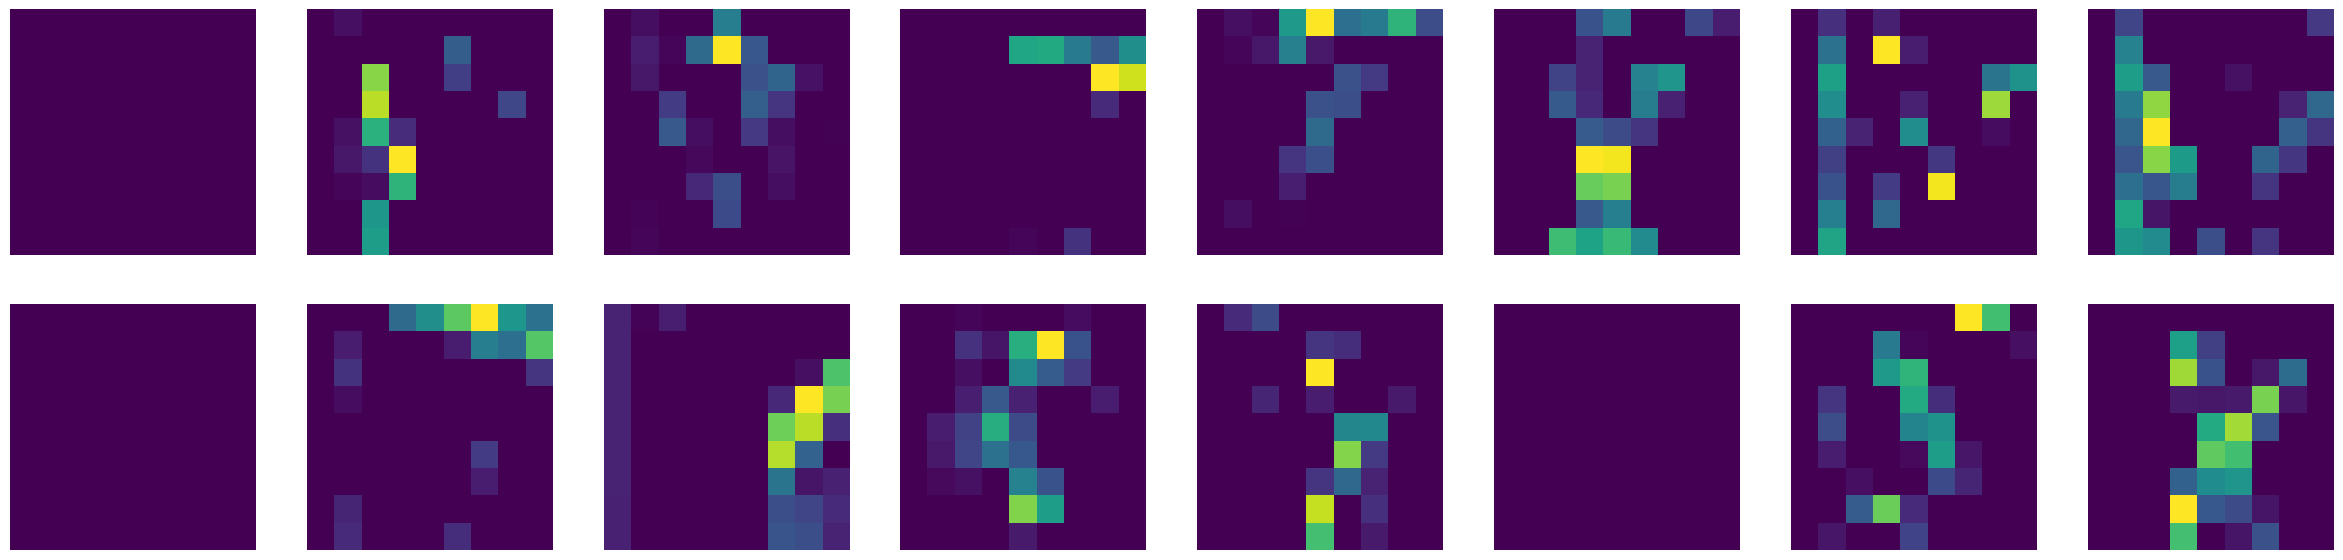

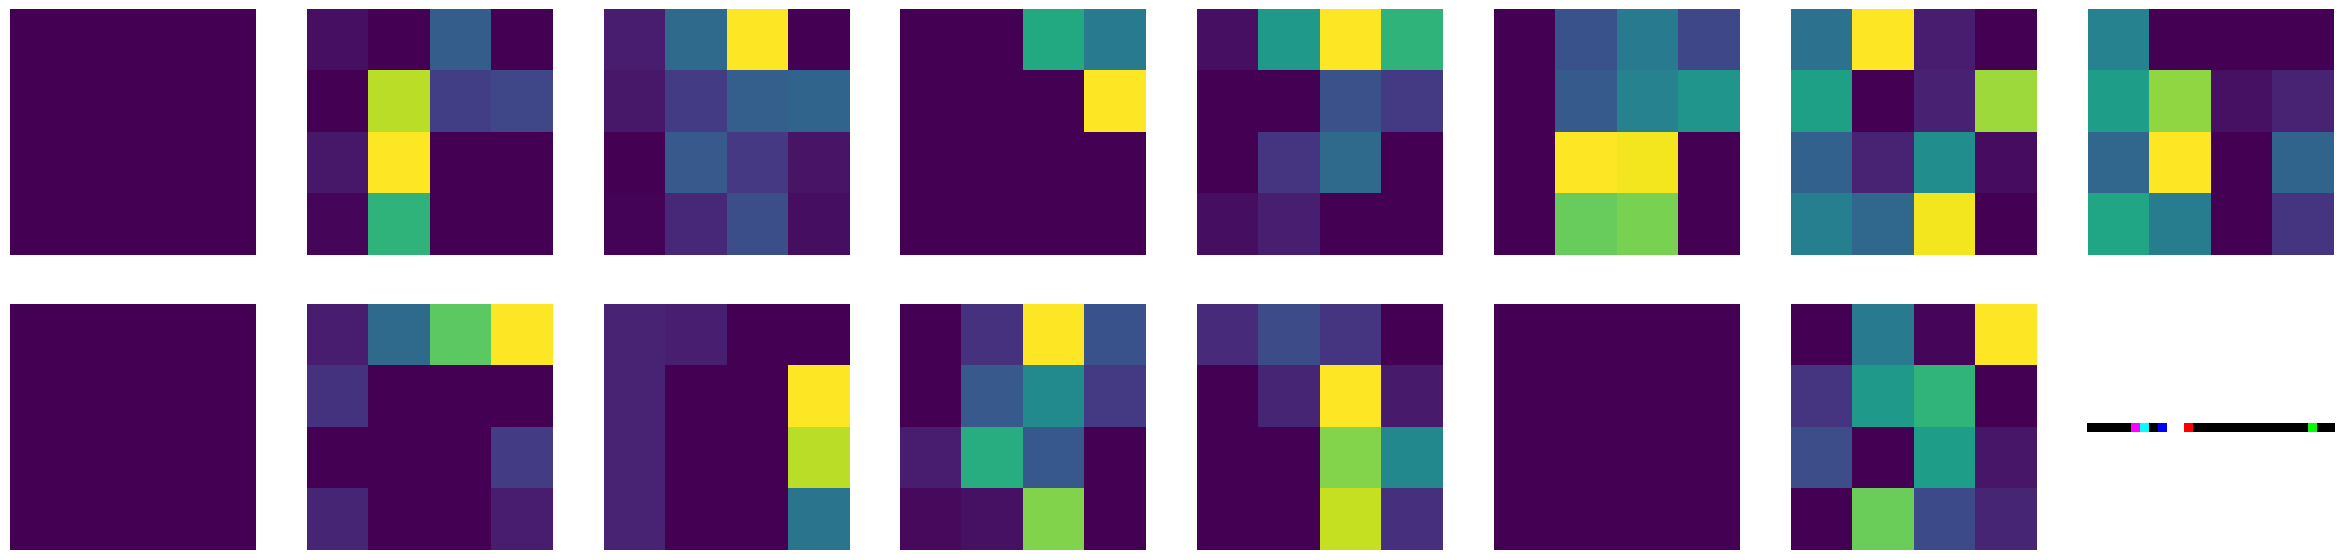



 9
-----------------------------------------------------
1st convolutionnal layer
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
conv2d_1 | Features Shape: (1, 9, 9, 16)
Dimension 16
--------
1nd Pooling
['lambda', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
max_pooling2d_1 | Features Shape: (1, 4, 4, 16)
Dimension 16
-----------------------------------------------------


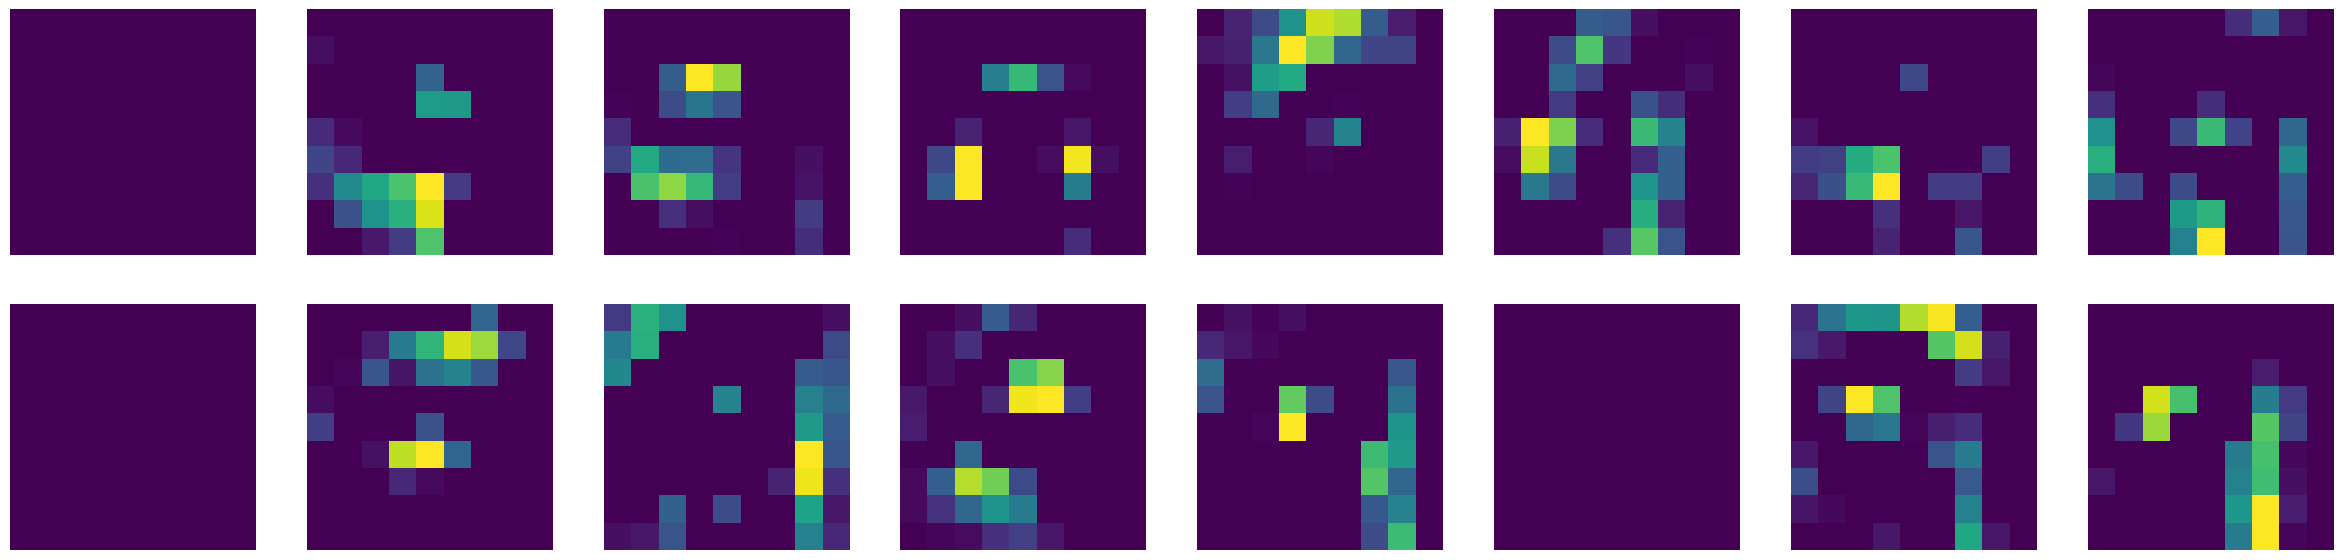

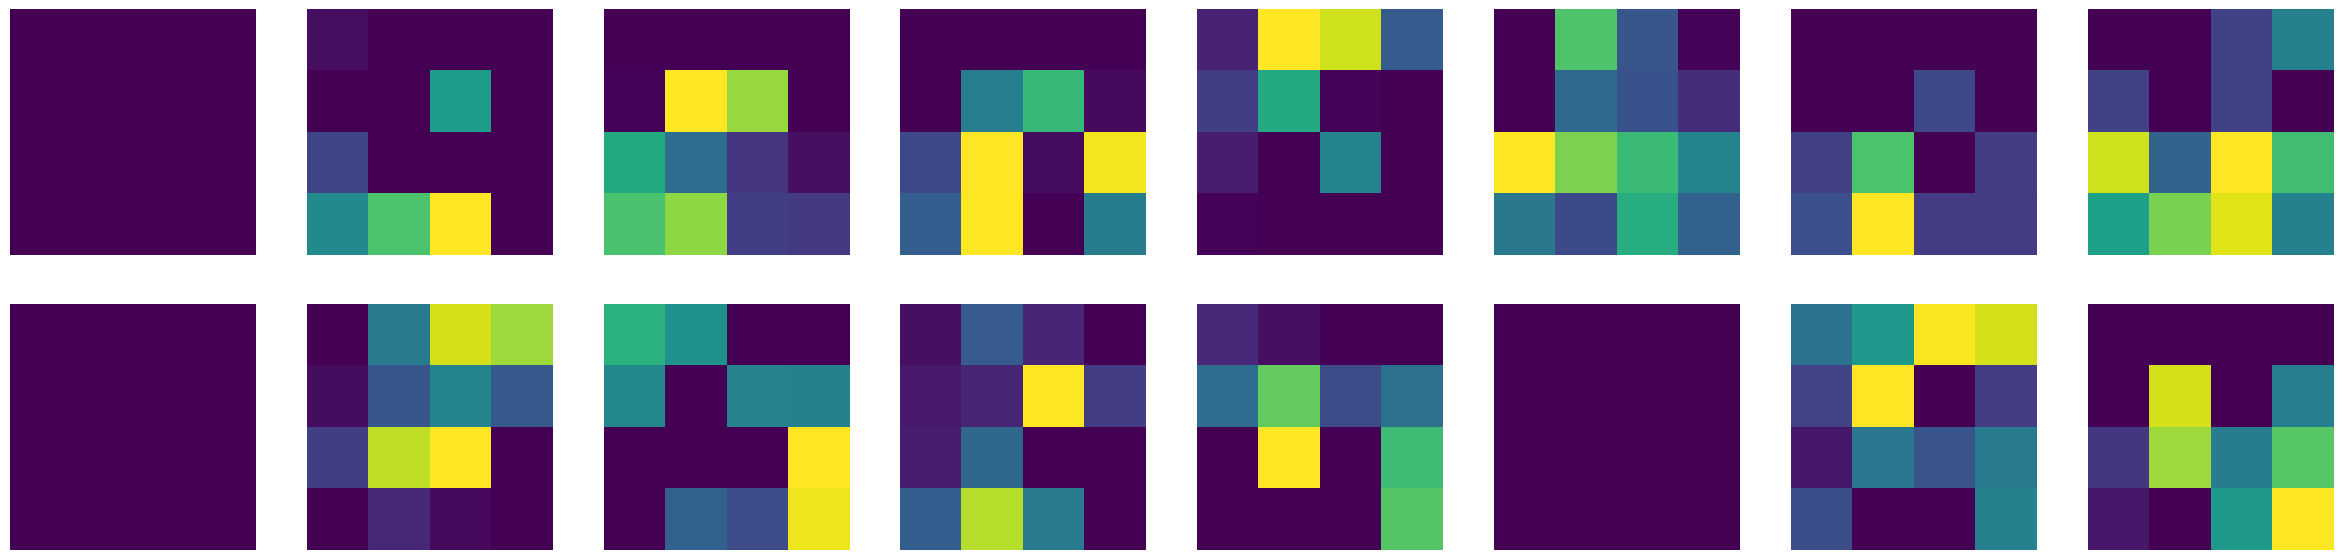

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
import cv2
import os
import glob

def display_image_filtered(name_image,model,layer_name,input_img):
    inp= model.inputs
    print([layer.name for layer in model.layers])
    out1= model.get_layer(layer_name).output
    feature_map_1= Model(inputs= inp, outputs= out1)
    f=feature_map_1.predict(input_img)
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results/results_{name_image}'):
        os.makedirs(f'results/results_{name_image}')
    for i in range(dim):
        ax = fig.add_subplot(dim//2,dim//2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results/results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])



# Create a dictionary to map the class names to the corresponding image paths
image_paths = {}
for name in class_names:
    # Get the path to the first image in the folder for the current class
    image_path = glob.glob(f'dataset_handwritting/{name}/*.jpeg')[0]

    # Add the image path to the dictionary
    image_paths[name] = image_path

num = 1
for name in class_names:
    # Get the image path for the current class
    image_path = image_paths[name]

    # Load and preprocess the image
    image_brut = img_to_array(load_img(image_path))
    image = np.expand_dims(cv2.resize(image_brut,(img_height,img_width)), axis=0)

    # Display the image
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    print('\n\n', name)

    # Display the filtered images
    for i in range(0,1):
        if num == 0 and i==0:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d',image)
            print('--------')
            print(f'{i-1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d',image)
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d_{num+i}',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d_{num+i}',image)
            print('-----------------------------------------------------')
